###1. Limpieza de datos con Python:
* Detección y eliminación de valores duplicados: Asegúrate de que cada registro en el dataset sea único.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
dato = 'hotel_bookings.csv'
df = pd.read_csv(dato)

# Detección de duplicados
duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")

# Eliminación de duplicados
df_sin_duplicados = df.drop_duplicates()

# Verificar que no haya duplicados después de la eliminación
duplicados_post_eliminacion = df_sin_duplicados.duplicated().sum()
print(f"Número de filas duplicadas después de la limpieza: {duplicados_post_eliminacion}")

# Guardo el dataframe limpio en un nuevo archivo CSV
df_sin_duplicados.to_csv('hotel_bookings_limpio.csv', index=False)


Número de filas duplicadas: 31994
Número de filas duplicadas después de la limpieza: 0


In [17]:
csv = pd.read_csv('hotel_bookings_limpio.csv')
df = pd.DataFrame(csv)

* Verificación y ajuste de tipos de datos: Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

In [18]:
# Verificación de los tipos de datos actuales
tipos_de_datos = df_sin_duplicados.dtypes
print(tipos_de_datos)

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [19]:
# Ajuste de tipos de datos según el diccionario común
df_sin_duplicados['lead_time'] = df_sin_duplicados['lead_time'].astype(int)
df_sin_duplicados['arrival_date_year'] = df_sin_duplicados['arrival_date_year'].astype(int)
df_sin_duplicados['arrival_date_week_number'] = df_sin_duplicados['arrival_date_week_number'].astype(int)
df_sin_duplicados['arrival_date_day_of_month'] = df_sin_duplicados['arrival_date_day_of_month'].astype(int)
df_sin_duplicados['stays_in_weekend_nights'] = df_sin_duplicados['stays_in_weekend_nights'].astype(int)
df_sin_duplicados['stays_in_week_nights'] = df_sin_duplicados['stays_in_week_nights'].astype(int)
df_sin_duplicados['adults'] = df_sin_duplicados['adults'].astype(int)
df_sin_duplicados['children'] = df_sin_duplicados['children'].fillna(0).astype(int)  # Asegurarse de que no haya NaN
df_sin_duplicados['babies'] = df_sin_duplicados['babies'].astype(int)
df_sin_duplicados['previous_cancellations'] = df_sin_duplicados['previous_cancellations'].astype(int)
df_sin_duplicados['previous_bookings_not_canceled'] = df_sin_duplicados['previous_bookings_not_canceled'].astype(int)
df_sin_duplicados['booking_changes'] = df_sin_duplicados['booking_changes'].astype(int)
df_sin_duplicados['days_in_waiting_list'] = df_sin_duplicados['days_in_waiting_list'].astype(int)
df_sin_duplicados['required_car_parking_spaces'] = df_sin_duplicados['required_car_parking_spaces'].astype(int)
df_sin_duplicados['total_of_special_requests'] = df_sin_duplicados['total_of_special_requests'].astype(int)

# Ajuste de columnas numéricas flotantes
df_sin_duplicados['adr'] = df_sin_duplicados['adr'].astype(float)
df_sin_duplicados['agent'] = df_sin_duplicados['agent'].astype(float)
df_sin_duplicados['company'] = df_sin_duplicados['company'].astype(float)

# Conversión de columnas de fecha
df_sin_duplicados['reservation_status_date'] = pd.to_datetime(df_sin_duplicados['reservation_status_date'])

# Verificación final de tipos de datos
tipos_de_datos_ajustados = df_sin_duplicados.dtypes
print(tipos_de_datos_ajustados)

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

* Consistencia en valores categóricos: Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘yes’, ‘Yes’, ‘YES’).

In [20]:
# Verificación de columnas categóricas
columnas_categoricas = df_sin_duplicados.select_dtypes(include=['object']).columns
print(f"Columnas categóricas:\n{columnas_categoricas}")

# Función para estandarizar los valores categóricos
def estandarizar_categorias(df, columnas):
    for columna in columnas:
        # Convertir los valores a minúsculas para consistencia y eliminar espacios
        df[columna] = df[columna].str.lower().str.strip()
    return df

# Aplicar la función de estandarización a las columnas categóricas
df_sin_duplicados = estandarizar_categorias(df_sin_duplicados, columnas_categoricas)

# Verificación de valores únicos en cada columna categórica después de la estandarización
for columna in columnas_categoricas:
    print(f"\n\nValores únicos en {columna}:\n{df_sin_duplicados[columna].unique()}")

Columnas categóricas:
Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status'],
      dtype='object')


Valores únicos en hotel:
['resort hotel' 'city hotel']


Valores únicos en arrival_date_month:
['july' 'august' 'september' 'october' 'november' 'december' 'january'
 'february' 'march' 'april' 'may' 'june']


Valores únicos en meal:
['bb' 'fb' 'hb' 'sc' 'undefined']


Valores únicos en country:
['prt' 'gbr' 'usa' 'esp' 'irl' 'fra' nan 'rou' 'nor' 'omn' 'arg' 'pol'
 'deu' 'bel' 'che' 'cn' 'grc' 'ita' 'nld' 'dnk' 'rus' 'swe' 'aus' 'est'
 'cze' 'bra' 'fin' 'moz' 'bwa' 'lux' 'svn' 'alb' 'ind' 'chn' 'mex' 'mar'
 'ukr' 'smr' 'lva' 'pri' 'srb' 'chl' 'aut' 'blr' 'ltu' 'tur' 'zaf' 'ago'
 'isr' 'cym' 'zmb' 'cpv' 'zwe' 'dza' 'kor' 'cri' 'hun' 'are' 'tun' 'jam'
 'hrv' 'hkg' 'irn' 'geo' 'and' 'gib' 'ury' 'jey' 'caf' 'cyp' 'col' 'ggy'
 'kwt' 'n

In [21]:
print(df.isna().sum())

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


* Manejo de valores faltantes: Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato

In [23]:
# Identificar valores faltantes
valores_nulos = df_sin_duplicados.isnull().sum()
print(f"Valores nulos por columna:\n{valores_nulos}")

# Manejo de valores faltantes

# Para 'children'
df_sin_duplicados['children'].fillna(0, inplace=True)

# Para 'country'
df_sin_duplicados['country'].fillna('Unknown', inplace=True)

# Para columnas numéricas, rellenamos con cero
columnas_numericas = df_sin_duplicados.select_dtypes(include=['int64', 'float64']).columns
for columna in columnas_numericas:
    df_sin_duplicados[columna].fillna(0, inplace=True)

# Verificar que ya no haya valores nulos
valores_nulos_actualizados = df_sin_duplicados.isnull().sum()
print(f"Valores nulos después de rellenar:\n{valores_nulos_actualizados}")

Valores nulos por columna:
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
a

<ipython-input-23-2191a9f31ef3>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sin_duplicados['children'].fillna(0, inplace=True)
<ipython-input-23-2191a9f31ef3>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

* Detección de datos anómalos: Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, una estancia de 1000 noches).

In [24]:
# Definir columnas numéricas relevantes para análisis de outliers
columnas_relevantes = ['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'lead_time']

# Usar el método del rango intercuartílico (IQR) para detectar outliers
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    # Limites para detectar outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    # Identificación de outliers
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    return outliers

# Detectar y mostrar outliers en cada columna relevante
for columna in columnas_relevantes:
    outliers_columna = detectar_outliers(df_sin_duplicados, columna)
    print(f"Outliers en {columna}:\n{outliers_columna[[columna]]}")

# Opcional: Corregir outliers reemplazándolos por los límites superiores o inferiores
def corregir_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    # Reemplazar los outliers
    df[columna] = df[columna].apply(lambda x: limite_inferior if x < limite_inferior else limite_superior if x > limite_superior else x)

# Corregir los outliers en las columnas relevantes
for columna in columnas_relevantes:
    corregir_outliers(df_sin_duplicados, columna)

# Verificar si se corrigieron los outliers
for columna in columnas_relevantes:
    outliers_columna = detectar_outliers(df_sin_duplicados, columna)
    print(f"Outliers después de la corrección en {columna}: {outliers_columna[[columna]]}")

Outliers en stays_in_weekend_nights:
        stays_in_weekend_nights
87                            6
1149                          6
1655                         13
1754                          6
1790                          8
...                         ...
103282                        9
105050                        6
106335                        6
106561                       13
109038                        8

[220 rows x 1 columns]
Outliers en stays_in_week_nights:
        stays_in_week_nights
30                        10
31                        11
52                        10
85                        10
86                        10
...                      ...
117482                     9
117821                    12
118403                    10
118478                     9
118570                    10

[1531 rows x 1 columns]
Outliers en adults:
        adults
2            1
3            1
20           1
30           1
34           3
...        ...
119370       1
119372  

###2. Exploración de datos con Python:
* Visualizaciones exploratorias univariadas: Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

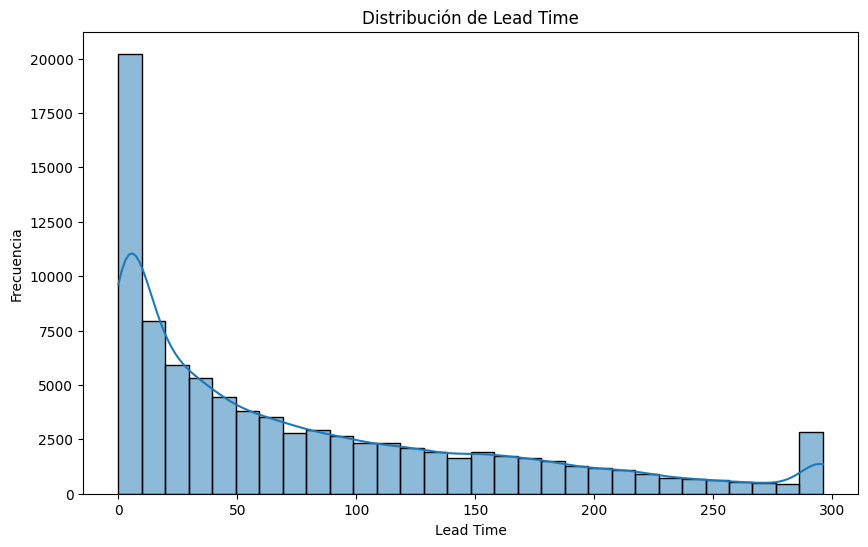

'\nEl histograma muestra la distribución del tiempo de anticipación de las reservas. La mayoría de las reservas se realizan con poco tiempo de antelación, disminuyendo gradualmente a medida que aumenta el tiempo de anticipación. Hay un pico notable alrededor de los 300 días. Esencialmente, se observa que muchos clientes no planifican con mucha antelación. \n'

In [28]:
# Crea una visualización univariada
# Figura 1
plt.figure(figsize=(10, 6))
sns.histplot(df_sin_duplicados['lead_time'], bins=30, kde=True)
plt.title('Distribución de Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Frecuencia')
plt.show()

# Interpretación del gráfico
"""
El histograma muestra la distribución del tiempo de anticipación de las reservas. La mayoría de las reservas se realizan con poco tiempo de antelación, disminuyendo gradualmente a medida que aumenta el tiempo de anticipación. Hay un pico notable alrededor de los 300 días. Esencialmente, se observa que muchos clientes no planifican con mucha antelación.
"""

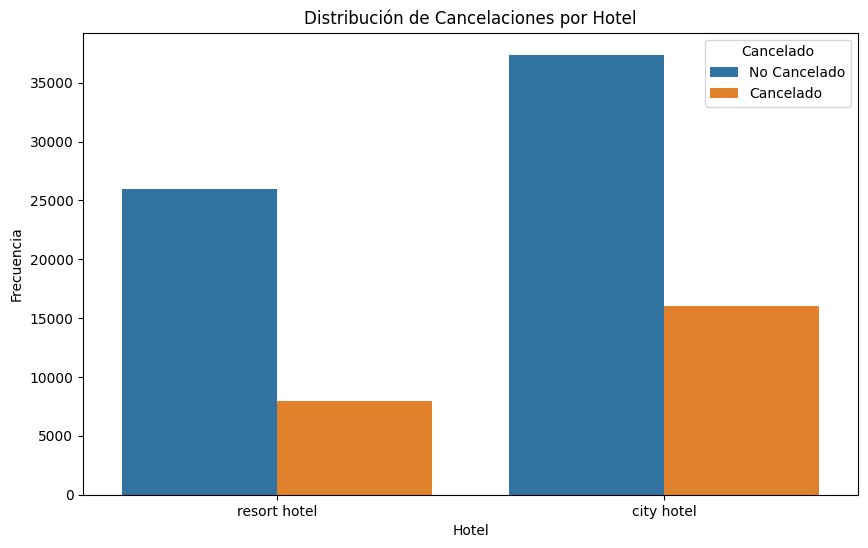

In [29]:
# Crea una visualización univariada
# Figura 2
plt.figure(figsize=(10, 6))
sns.countplot(data=df_sin_duplicados, x='hotel', hue='is_canceled')
plt.title('Distribución de Cancelaciones por Hotel')
plt.xlabel('Hotel')
plt.ylabel('Frecuencia')
plt.legend(title='Cancelado', labels=['No Cancelado', 'Cancelado'])
plt.show()

# Interpretación del gráfico
'''
El gráfico muestra la distribución de cancelaciones por tipo de hotel. Para los hoteles de resort, vemos alrededor de 25,000 no cancelados y 5,000 cancelados. Para los hoteles de ciudad, hay aproximadamente 35,000 no cancelados y 10,000 cancelados. Esto sugiere que las cancelaciones son más frecuentes en los hoteles de ciudad que en los resorts.
'''

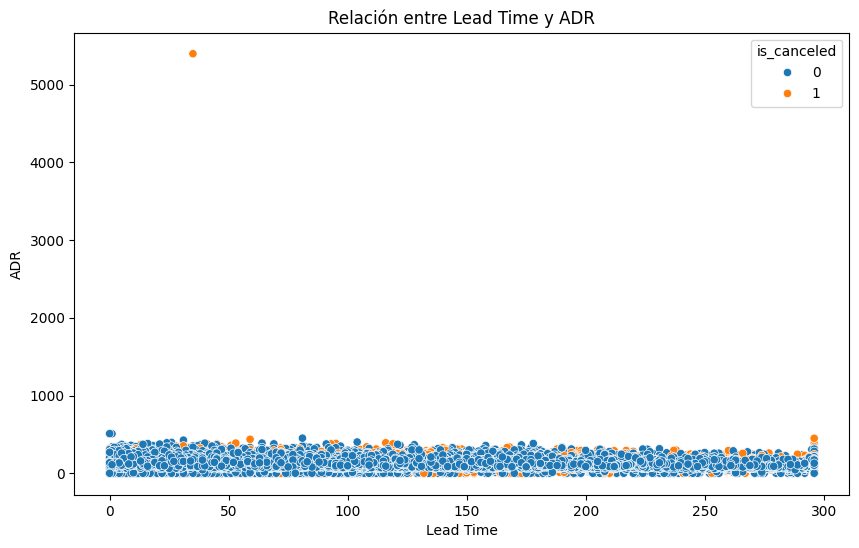

'\nEl gráfico de dispersión muestra la relación entre el tiempo de entrega y la tarifa diaria promedio ( ADR ). La mayoría de los puntos de datos se agrupan cerca de la parte inferior, lo que indica valores de ADR más bajos, y algunos valores atípicos tienen valores de ADR más altos. Los colores diferencian entre reservas canceladas y no canceladas. Puede ver cómo las cancelaciones afectan la relación entre el tiempo de entrega y la tarifa diaria promedio.\n'

In [33]:
# Crea una visualización multivariada
# Figura Multivariada 1
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sin_duplicados, x='lead_time', y='adr', hue='is_canceled')
plt.title('Relación entre Lead Time y ADR')
plt.xlabel('Lead Time')
plt.ylabel('ADR')
plt.show()

# Interpretación del gráfico
'''
El gráfico de dispersión muestra la relación entre el tiempo de entrega y la tarifa diaria promedio ( ADR ). La mayoría de los puntos de datos se agrupan cerca de la parte inferior, lo que indica valores de ADR más bajos, y algunos valores atípicos tienen valores de ADR más altos. Los colores diferencian entre reservas canceladas y no canceladas. Puede ver cómo las cancelaciones afectan la relación entre el tiempo de entrega y la tarifa diaria promedio.
'''

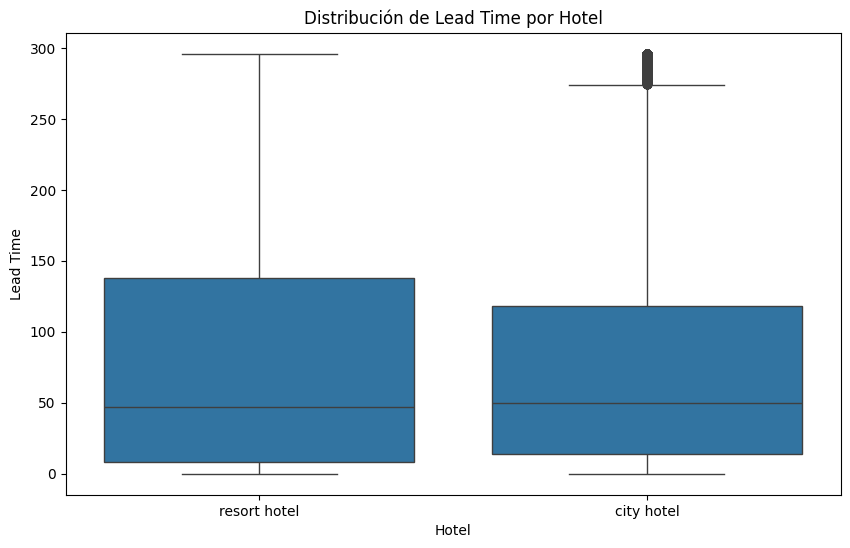

'\nClientes de hoteles de resort planifican con más anticipación que los de hoteles de ciudad. Las cancelaciones son más frecuentes en hoteles de ciudad. La mayoría de las reservas se hacen con poco tiempo de antelación. Notamos algunos casos atípicos con tarifas muy altas\n'

In [34]:
# Crea una visualización multivariada
# Figura Multivariada 2
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sin_duplicados, x='hotel', y='lead_time')
plt.title('Distribución de Lead Time por Hotel')
plt.xlabel('Hotel')
plt.ylabel('Lead Time')
plt.show()

# Interpretación del gráfico
'''
Clientes de hoteles de resort planifican con más anticipación que los de hoteles de ciudad. Las cancelaciones son más frecuentes en hoteles de ciudad. La mayoría de las reservas se hacen con poco tiempo de antelación. Notamos algunos casos atípicos con tarifas muy altas
'''

###3. Análisis adicional:
* Estadísticas descriptivas: Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas

In [39]:
# Estadísticas descriptivas
estadisticas_descriptivas = df_sin_duplicados.describe()
print("Estadísticas descriptivas:")
print(estadisticas_descriptivas)

Estadísticas descriptivas:
        is_canceled     lead_time  arrival_date_year  \
count  87396.000000  87396.000000       87396.000000   
mean       0.274898     78.363987        2016.210296   
min        0.000000      0.000000        2015.000000   
25%        0.000000     11.000000        2016.000000   
50%        0.000000     49.000000        2016.000000   
75%        1.000000    125.000000        2017.000000   
max        1.000000    296.000000        2017.000000   
std        0.446466     81.047312           0.686102   

       arrival_date_week_number  arrival_date_day_of_month  \
count              87396.000000               87396.000000   
mean                  26.838334                  15.815541   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   27.000000                  16.000000   
75%                   37.000000                  23.000000   
max                   53.000000   

* Identificación de tendencias: Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.

In [40]:
# Identificación de tendencias: Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.
'''

Cancelaciones:

El 27.5% de las reservas se cancelaron.

Fecha de Llegada:

Media: Año 2016.

Estancias Fin de Semana:

Media: 0.99 noches.

Estancias Noches de Semana:

Media: 2.57 noches.

Número de Adultos:

Medios: 2.

ADR (Tarifa Diaria Promedio):

Media: 106.34, con un máximo de 5400.

'''

'\n\nCancelaciones:\n\nEl 27.5% de las reservas se cancelaron.\n\nFecha de Llegada:\n\nMedia: Año 2016.\n\nEstancias Fin de Semana:\n\nMedia: 0.99 noches.\n\nEstancias Noches de Semana:\n\nMedia: 2.57 noches.\n\nNúmero de Adultos:\n\nMedios: 2.\n\nADR (Tarifa Diaria Promedio):\n\nMedia: 106.34, con un máximo de 5400.\n\n'